In [1]:
import pandas as pd
import numpy as np
import os
import folium
from folium import plugins
import webbrowser
from tqdm import *
# import osmnx
# import geopandas as gp
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
sp_data = pd.read_csv('../data/singapore_listings.csv')
sp_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [3]:
lat = sp_data['latitude'].values
lon = sp_data['longitude'].values

sp_map = folium.Map(location=[sp_data['latitude'].mean(), sp_data['longitude'].mean()], zoom_start = 10)
marker_cluster = plugins.MarkerCluster().add_to(sp_map)
for i in range(len(lat)):
     folium.Marker([lat[i], lon[i]], popup='<i>Mt. Hood Meadows</i>').add_to(marker_cluster)   
#         HeatMap(data1).add_to(map_osm) 
sp_map.save("sp_map.html")
webbrowser.open("sp_map.html")

In [11]:
price = sp_data['price'].values
nbh_group = sp_data['neighbourhood_group'].values
nbh = sp_data['neighbourhood'].values

(array([2.59437022e-05, 0.00000000e+00, 1.03774809e-04, 9.59916980e-04,
        1.86794656e-03, 3.94344273e-03, 3.03541315e-03, 4.95524711e-03,
        8.27604099e-03, 3.16513166e-03, 7.70527954e-03, 7.75716695e-03,
        7.54961733e-03, 8.25009729e-03, 1.06369179e-03, 3.89155532e-03,
        4.64392269e-03, 5.68167077e-03, 5.83733299e-03, 3.34673758e-03,
        5.96705150e-03, 2.77597613e-03, 4.54014788e-03, 6.61564405e-03,
        1.06369179e-03, 4.15099235e-03, 5.26657154e-03, 6.53781295e-03,
        4.17693605e-03, 2.56842651e-03, 5.81138929e-03, 2.90569464e-03,
        2.38682060e-03, 4.92930341e-03, 2.85380724e-04, 1.97172136e-03,
        3.29485018e-03, 2.98352575e-03, 1.71228434e-03, 2.07549617e-03,
        4.79958490e-03, 1.40095992e-03, 9.85860682e-04, 2.80191983e-03,
        4.66986639e-04, 1.91983396e-03, 7.26423661e-04, 1.79011545e-03,
        1.21935400e-03, 4.15099235e-04, 2.77597613e-03, 1.29718511e-03,
        1.06369179e-03, 1.66039694e-03, 1.03774809e-04, 5.967051

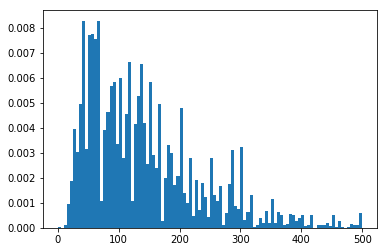

In [22]:
pos = np.where(price > 500)
y_res = np.delete(price, pos, axis = 0) 
plt.hist(y_res, bins = 100, density = True)
x = np.arange(0, 500, 0.5)
plt.plot(x, 0.5 * scipy.stats.norm.pdf(x, loc = mu, scale = sigma))
# hist = Counter(y_res)
# hh = np.array(hist.values()).reshape(-1,1)
# plt.bar(list(hist.keys()),list(hist.values()))

/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/ruoqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  


(array([3.99949406e-03, 3.51125727e-03, 1.48747786e-03, 5.69187959e-04,
        1.55578042e-04, 8.60106248e-05, 5.56539337e-05, 4.30053124e-05,
        2.27675183e-05, 8.85403491e-06, 5.05944852e-06, 3.79458639e-06,
        6.32431065e-06, 6.32431065e-06, 5.05944852e-06, 1.26486213e-06,
        0.00000000e+00, 0.00000000e+00, 2.52972426e-06, 0.00000000e+00,
        2.52972426e-06, 0.00000000e+00, 0.00000000e+00, 1.26486213e-06,
        0.00000000e+00, 1.26486213e-06, 2.52972426e-06, 0.00000000e+00,
        0.00000000e+00, 1.26486213e-06, 1.26486213e-06, 0.00000000e+00,
        1.26486213e-06, 1.26486213e-06, 0.00000000e+00, 1.26486213e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.26486213e-06, 1.26486213e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.52972426e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

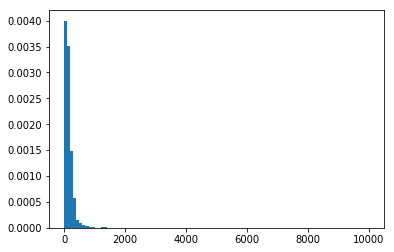

In [21]:
pos = lof_create(price)
y_res = np.delete(price, pos, axis = 0) 
plt.hist(y_res, bins = 100, density = True)

/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/ruoqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  


<BarContainer object of 374 artists>

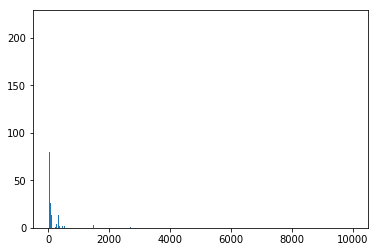

In [17]:
pos = lof_create(price)
y_res = np.delete(price, pos, axis = 0) 
hist = Counter(y_res)
hh = np.array(hist.values()).reshape(-1,1)
plt.bar(list(hist.keys()),list(hist.values()))

In [154]:
hist = Counter(nbh_group)
hh = np.array(hist.values()).reshape(-1,1)

<BarContainer object of 5 artists>

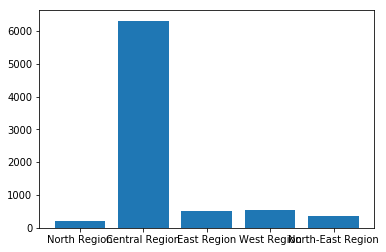

In [155]:
mm = list(hist.values())
plt.bar(list(hist.keys()),list(hist.values()))

In [156]:
location = np.append(lat.reshape(-1,1), lon.reshape(-1,1), axis = 1)
location.shape

(7907, 2)

## Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(location, price, test_size = 0.15)

## Linear Regression

In [67]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

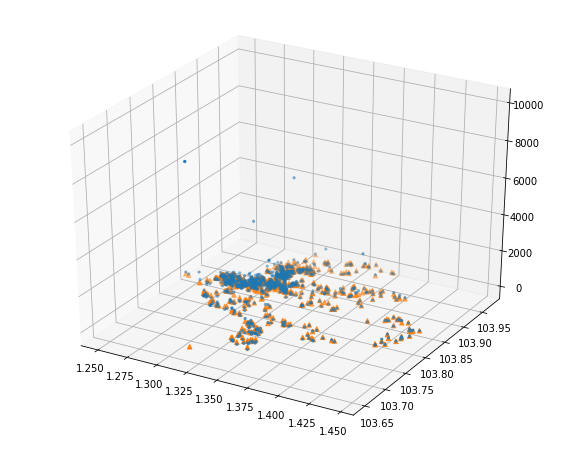

In [106]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test.reshape(-1,1), marker = '.')
ax.scatter(X_test[:,0], X_test[:,1], y_pred_lr.reshape(-1,1), marker = '^')

In [107]:
print(f'Mean squared error is {mse(y_test, y_pred_lr)}, R2 score is {r2_score(y_test, y_pred_lr)}')

Mean squared error is 130560.52252001828, R2 score is 0.005535038481523036


## SVM

In [108]:
svr = SVR(kernel = 'sigmoid', C=1.0, epsilon=0.2)
svr.fit(X_train,y_train)
y_pred_svm = svr.predict(X_test)

/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


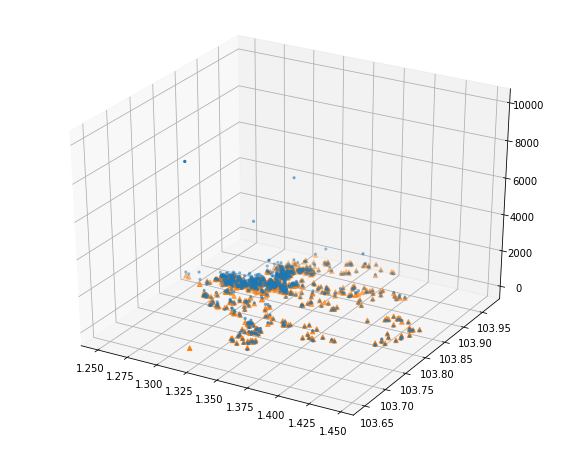

In [109]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test.reshape(-1,1), marker = '.')
ax.scatter(X_test[:,0], X_test[:,1], y_pred_svm.reshape(-1,1), marker = '^')

In [110]:
print(f'Mean squared error is {mse(y_test, y_pred_svm)}, R2 score is {r2_score(y_test, y_pred_svm)}')

Mean squared error is 133017.1454759899, R2 score is -0.013176785017813275


## Random Forest

In [111]:
forest_reg = RandomForestRegressor(random_state=41)
forest_reg.fit(X_train,y_train)

/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=41, verbose=0, warm_start=False)

In [112]:
y_pred_forest = forest_reg.predict(X_test)

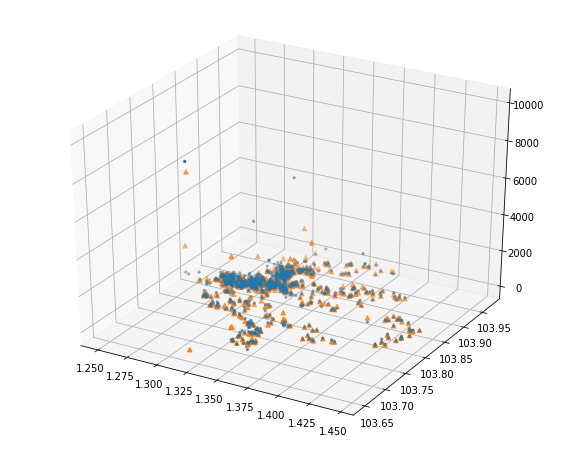

In [113]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test.reshape(-1,1), marker = '.')
ax.scatter(X_test[:,0], X_test[:,1], y_pred_forest.reshape(-1,1), marker = '^')

In [114]:
print(f'Mean squared error is {mse(y_test, y_pred_forest)}, R2 score is {r2_score(y_test, y_pred_forest)}')

Mean squared error is 187468.24486512216, R2 score is -0.42792474568371563


## Multi-layer Perceptron

In [115]:
mlp = MLPRegressor(hidden_layer_sizes = (100,3), learning_rate = 'adaptive')
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

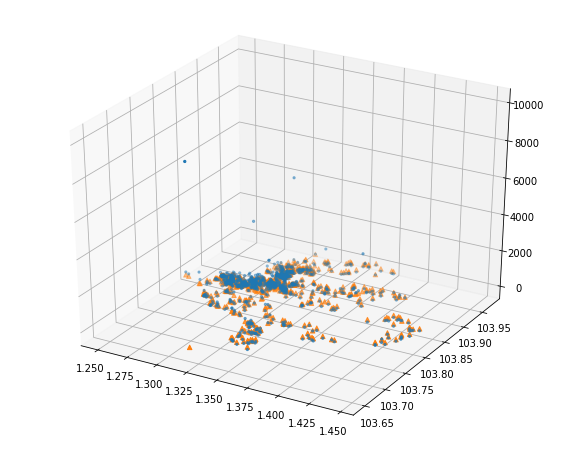

In [116]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test.reshape(-1,1), marker = '.')
ax.scatter(X_test[:,0], X_test[:,1], y_pred_mlp.reshape(-1,1), marker = '^')

In [117]:
print(f'Mean squared error is {mse(y_test, y_pred_mlp)}, R2 score is {r2_score(y_test, y_pred_mlp)}')

Mean squared error is 131304.6567848651, R2 score is -0.00013294935103180805


## LocalOutlierFactor

In [15]:
from sklearn.neighbors import LocalOutlierFactor

In [6]:
lof = LocalOutlierFactor(n_neighbors = 2)
res = lof.fit_predict(y_test.reshape(-1,1))

NameError: name 'y_test' is not defined

In [16]:
def lof_create(y):
    from sklearn.neighbors import LocalOutlierFactor
    lof = LocalOutlierFactor(n_neighbors = 2)
    res = lof.fit_predict(y.reshape(-1,1))
    return res

def lof_filter(X, y, f):
    pos = np.where(f == -1)
    X_res = np.copy(X)
    y_res = np.copy(y)
    X_res = np.delete(X_res, pos, axis = 0)
    y_res = np.delete(y_res, pos, axis = 0)
    return X_res, y_res

In [158]:
XX, yy = lof_filter(X_train, y_train, lof.fit_predict(y_train.reshape(-1,1)))
mlp = MLPRegressor(hidden_layer_sizes = (100,3), learning_rate = 'adaptive')
mlp.fit(XX,yy)
y_pred_mlp = mlp.predict(X_test)

/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


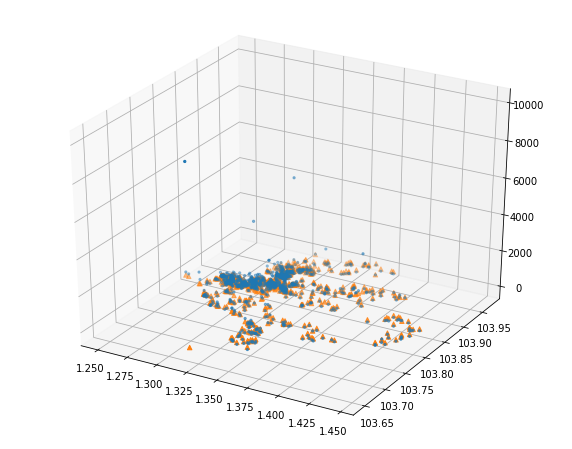

In [159]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test.reshape(-1,1), marker = '.')
ax.scatter(X_test[:,0], X_test[:,1], y_pred_mlp.reshape(-1,1), marker = '^')

In [160]:
print(f'Mean squared error is {mse(y_test, y_pred_mlp)}, R2 score is {r2_score(y_test, y_pred_mlp)}')

Mean squared error is 131329.21980759694, R2 score is -0.00032004315997435917


In [243]:
def get_pos_price(dfs, lof = 0):
    df = dfs.copy()
    lat = df['latitude'].values
    lon = df['longitude'].values
    X_cor = np.array(list(zip(lat,lon)))
    y = df['price'].values
    if lof:
        lof_pos = lof_create(y)
        X_cor, y = lof_filter(X_cor, y, lof_pos)
        print(lof_pos)
        sp_data = df.drop(list(np.where(lof_pos == -1)[0]), axis = 0)
    price = df['price'].values
    min_nights = df['minimum_nights'].values
    #num_reviews = sp_data['number_of_reviews'].values
    #ave_reviews = sp_data['reviews_per_month'].values
    host_own = df['calculated_host_listings_count'].values
    avail = df['availability_365'].values
    
    pos_price = df.groupby(['latitude','longitude']).price.unique().agg(dict)

    pos_min_nights = df.groupby(['latitude','longitude']).minimum_nights.unique().agg(dict)
    #pos_num_reviews = sp_data.groupby(['latitude','longitude']).number_of_reviews.unique().agg(dict)
    #pos_ave_reviews = sp_data.groupby(['latitude','longitude']).reviews_per_month.unique().agg(dict)
    pos_host_own = df.groupby(['latitude','longitude']).calculated_host_listings_count.unique().agg(dict)
    pos_avail = df.groupby(['latitude','longitude']).availability_365.unique().agg(dict)
    return X_cor, y, pos_min_nights, pos_host_own, pos_avail, pos_price

In [244]:
def segment_position(pos_min_nights, pos_host_own, pos_avail, pos_price, lat_bins, lon_bins):
    keys, gmn, gho, ga, values = [], [], [], [], []
    lat, lon = sorted([x[0] for x in pos_price.keys()]), sorted([x[1] for x in pos_price.keys()])
    batch_lat, batch_lon = len(pos_price)//lat_bins, len(pos_price)//lon_bins
    for i in tqdm_notebook(range(lat_bins)):
        lat_gap = lat[i*batch_lat: (i+1)*batch_lat]
        ave_lat = np.mean(lat_gap)
        for j in range(lon_bins):
            lon_gap = lon[j*batch_lon: (j+1)*batch_lon]
            ave_lon = np.mean(lon_gap)
            ave_values, ave_pmn, ave_pnr, ave_par, ave_pho, ave_pa = [], [], [], [], [], []
            for m in range(batch_lat):
                for n in range(batch_lon):
                    if (lat_gap[m], lon_gap[n]) in pos_price.keys():
                        price_list = pos_price[(lat_gap[m], lon_gap[n])]
                        pmn = pos_min_nights[(lat_gap[m], lon_gap[n])]
                        #pnr = pos_num_reviews[(lat_gap[m], lon_gap[n])]
                        #par = pos_ave_reviews[(lat_gap[m], lon_gap[n])]
                        pho = pos_host_own[(lat_gap[m], lon_gap[n])]
                        pa = pos_avail[(lat_gap[m], lon_gap[n])]
                        if len(price_list) == 1:
                            price = int(price_list)
                            min_nights = int(pmn)
                            #num_reviews = int(pnr)
                            #ave_reviews = int(par)
                            host_own = int(pho)
                            avail = int(pa)
                        else:
                            price = int(np.mean(price))
                            min_nights = int(np.mean(pmn))
                            #num_reviews = int(np.mean(pnr))
                            #ave_reviews = int(np.mean(par))
                            host_own = int(np.mean(pho))
                            avail = int(np.mean(pa))

                        ave_values.append(price)
                        ave_pmn.append(min_nights)
                        #ave_pnr.append(num_reviews)
                        #ave_par.append(ave_reviews)
                        ave_pho.append(host_own)
                        ave_pa.append(avail)
            if ave_values != []:
                values.append(np.mean(ave_values))
                gmn.append(np.mean(ave_pmn))
                #gnr.append(np.mean(ave_pnr))
                #gar.append(np.mean(ave_par))
                gho.append(np.mean(ave_pho))
                ga.append(np.mean(ave_pa))
                keys.append([ave_lat, ave_lon])
    return keys, gmn, gho, ga, values    

In [245]:
train_sp, test_sp = train_test_split(sp_data, test_size=1/20)

In [246]:
Xtrain, ytrain, pos_min_nights, pos_host_own, pos_avail, pos_price = get_pos_price(train_sp, lof = 1)
Xtest, ytest, _, _, _, _ = get_pos_price(test_sp)

[1 1 1 ... 1 1 1]


/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


KeyError: '[ 899 2156 6264 7505] not found in axis'

In [247]:
df = sp_data.copy()
y = df['price'].values
lof_pos = lof_create(y)
print(list(np.where(lof_pos == -1)[0]))
df = df.drop(list(np.where(lof_pos == -1)[0]), axis = 0)


[38, 116, 149, 180, 203, 252, 453, 466, 468, 562, 563, 610, 917, 949, 968, 995, 1002, 1049, 1076, 1087, 1136, 1183, 1261, 1496, 1538, 1621, 1706, 1791, 1930, 2033, 2100, 2312, 2410, 2455, 2583, 2599, 2667, 2781, 2799, 2813, 2874, 3047, 3168, 3183, 3323, 3485, 3546, 3553, 3555, 3631, 3654, 3822, 3891, 3947, 4023, 4034, 4213, 4302, 4336, 4399, 4409, 4605, 4630, 4631, 4643, 4711, 4744, 5068, 5125, 5128, 5131, 5160, 5184, 5459, 5525, 5559, 5613, 5626, 5669, 5725, 5732, 5759, 5765, 5905, 5982, 5994, 5998, 6014, 6026, 6126, 6127, 6133, 6187, 6229, 6231, 6252, 6436, 6541, 6566, 6754, 6840, 6955, 7045, 7229, 7271, 7336, 7341, 7344, 7408, 7465, 7504, 7547, 7600, 7601, 7649, 7660, 7672, 7715, 7720, 7722, 7733, 7750, 7860, 7874, 7875]


/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [248]:
train_coordinate, gmn, gho, ga, train_price = segment_position(pos_min_nights, pos_host_own, pos_avail, pos_price, 50, 50)

In [ ]:
from scipy.spatial import cKDTree
from scipy import inf
from collections import defaultdict

class PointPrediction:
    def __init__(self, r0, coordinate, cor_price):
        self.r = r0
        self.grid_cor = coordinate
        self.grid_price = cor_price
        
    def get_nearest_grid(self, X):
        nearest_grid = defaultdict(int)
        for point in X:
            grid_dis = np.linalg.norm(self.grid_cor-point,axis=1)
            grid_index = np.argmin(grid_dis)
            #print(grid_index)
            nearest_grid[str(point)] = grid_index
        return nearest_grid
        
    def score(self, X, y):
        tree = cKDTree(X)
        nearest_grid_train = self.get_nearest_grid(X)
        predict = []
        
        for point in X:
            grid_index = nearest_grid_train[str(point)]
            predict.append(self.grid_price[grid_index])
#             else:
#                 dis_neighbors = np.linalg.norm(point_neighbors[1:]-point,axis=1)
#                 weight_neighbors = dis_neighbors/sum(dis_neighbors)
#                 predict.append(weight_neighbors.dot(price_neighbors[1:].T))
                
        MSE = ((np.array(predict)-y)**2).mean()    
        return predict, MSE

In [9]:
class sele_classifier:
    def __init__(self):
        self.lr()
        self.svm()
        self.rf()
        self.mlp()
        print('Initialized')
        
    def lr(self):
        self.clf1 = LinearRegression()
        
    def svm(self):
        self.clf2 = SVR(kernel = 'sigmoid', C=1.0, epsilon=0.2)
        
    def rf(self):
        self.clf3 = RandomForestRegressor(random_state=4)
        
    def mlp(self):
        self.clf4 = MLPRegressor(hidden_layer_sizes = (100,3), learning_rate = 'adaptive')
        
    def fit(self, X ,y):
        self.clf.fit(X, y)
        
    def predict(self, X_test, y_test):
        y_pred = self.clf.predict(X_test)
        return y_pred
    
    def run(self, X_train, y_train, X_test, y_test, n = 4):
        clf = [self.clf1, self.clf2, self.clf3, self.clf4]
#         ax1, ax2, ax3, ax4 = plt.subplot(2, 2)
#                 fig = plt.figure(figsize=(10,8))
#         fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, projection='3d')
        names = ["Linear Regression", "SVM", "Random Forest", "Multi-layer Perceptron"]
        for i in tqdm_notebook(range(n)):
            self.clf = clf[i]
            self.fit(X_train, y_train)
            y_pred = self.predict(X_test, y_test)
#             ax = axs[i]
# #             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X_test[:,0], X_test[:,1], y_test.reshape(-1,1), marker = '.')
#             ax.scatter(X_test[:,0], X_test[:,1], y_pred.reshape(-1,1), marker = '^')
#             plt.imshow()
            print(f'Model is {names[i]}, Mean squared error is {mse(y_test, y_pred)}, R2 score is {r2_score(y_test, y_pred)}')

In [10]:
clf = sele_classifier()
clf.run(train_coordinate, train_price, Xtest, ytest)

Initialized


NameError: name 'train_coordinate' is not defined

In [113]:
pmn = np.array(gmn).reshape(-1,1) 
pho = np.array(gho).reshape(-1,1) 
pa = np.array(ga).reshape(-1,1) 
pp = np.array(train_price).reshape(-1, 1)
new_x = np.append(np.array(pmn).reshape(-1,1), np.array(pho).reshape(-1,1), axis = 1)
new_x = np.append(new_x, np.array(pa).reshape(-1, 1), axis = 1)
price = test_sp['price'].values.reshape(-1, 1)
min_nights = test_sp['minimum_nights'].values
host_own = test_sp['calculated_host_listings_count'].values
avail = test_sp['availability_365'].values
new_xtest = np.array(list(zip(min_nights,host_own,avail)))

In [114]:
clf = sele_classifier()
clf.run(new_x, pp, new_xtest, price)

Initialized


Model is Linear Regression, Mean squared error is 40513.76383901775, R2 score is -0.02293342874162274
Model is SVM, Mean squared error is 40581.90466747334, R2 score is -0.02465391888335189
Model is Random Forest, Mean squared error is 189346.33046665945, R2 score is -3.7808120670676324


/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ruoqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Model is Multi-layer Perceptron, Mean squared error is 41660.05411278459, R2 score is -0.051876151632952894



/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [129]:
xx_train = np.hstack((np.array(train_coordinate), new_x))
yy_train = np.array(train_price).reshape(-1,1)
xx_test = np.hstack((Xtest, new_xtest))
yy_test = ytest.reshape(-1,1)
clf = sele_classifier()
clf.run(xx_train, yy_train, xx_test, yy_test)

Initialized


Model is Linear Regression, Mean squared error is 41255.64121884636, R2 score is -0.041665116443347916
Model is SVM, Mean squared error is 40621.432642754065, R2 score is -0.02565196210258458
Model is Random Forest, Mean squared error is 88509.13000669384, R2 score is -1.234770094243618


/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ruoqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Model is Multi-layer Perceptron, Mean squared error is 41022.59027464325, R2 score is -0.035780805067776145



/Users/ruoqi/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
